## In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

In [2]:
# install packages
! pip install keras
! pip install tensorflow
! pip install opencv-python

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=97e093c9019d92534d7c1740a202b36b507d47c864d219cf9709c1c96ad258d6
  Stored in directory: c:\users\kadams\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [177]:
# import libraries (pg. 327)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import utils as np_utils
from keras import backend as K
from matplotlib import pyplot
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

## Load the MNIST data set.

In [147]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

## Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

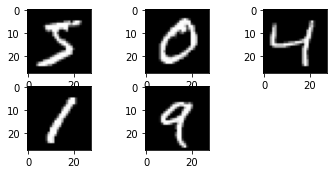

In [148]:
# Display first 5 images in training data set
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(data_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [149]:
# Display first five labels
pd.DataFrame(target_train[0:5]).set_axis(['label'], axis=1)

,label
0,5
1,0
2,4
3,1
4,9


## Build and train a Keras CNN classifier on the MNIST training set.

In [150]:
# Set that the color channel value will be last
K.set_image_data_format("channels_last")

In [151]:
# Set seed
np.random.seed(0)

In [152]:
# Set image information
channels = 1
height = 28
width = 28

In [153]:
# reshape dataset to have a single channel
data_train = data_train.reshape((data_train.shape[0], 28, 28, 1)) # height, width, channel
data_test = data_test.reshape((data_test.shape[0], 28, 28, 1)) # height, width, channel

In [154]:
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [155]:
# One-hot encode target
target_train = keras.utils.to_categorical(target_train)
target_test = keras.utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [156]:
# Start neural network
network = Sequential()

In [157]:
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
 kernel_size=(5, 5),
 input_shape=(height, width, channels),
 activation='relu'))

In [158]:
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

In [159]:
# Add dropout layer
network.add(Dropout(0.5))

In [160]:
# Add layer to flatten input
network.add(Flatten())

In [161]:
# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

In [162]:
# Add dropout layer
network.add(Dropout(0.5))

In [163]:
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

In [164]:
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric

In [165]:
# Train neural network
network.fit(features_train, # Features
 target_train, # Target
 epochs=2, # Number of epochs
 verbose=0, # Don't print description after each epoch
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Data for evaluation

In [166]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                      

In [167]:
# Use model to make predictions on test set
pred = network.predict(data_test)

In [168]:
# Convert values for confusion matrix
y_preds = np.argmax(pred, axis=1)

In [169]:
# Double check target_test shape
target_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [170]:
# Convert values for confusion matrix
y_true = np.argmax(target_test, axis=1)

## Report the test accuracy of your model.

In [171]:
## Calculate and print stats (from Mike Zoucha)
accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='micro')
recall = recall_score(y_true, y_preds, average='micro')
f1 = f1_score(y_true, y_preds, average='micro')

In [172]:
## Print classification report
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Display a confusion matrix on the test set classifications.

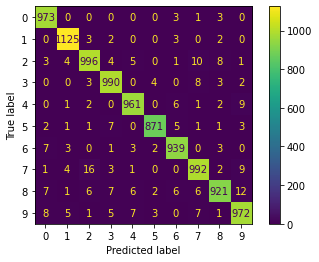

In [178]:
## Visualize confusion matrix
conf_matrix = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

## Summarize your results.

### The training set is used to perform the initial training of the model and initialize the weights of the neural network. Once the model is trained and parameter/arcitecture selection is complete with the training set, the test set is used  to test the predictive accuracy of the trained neural network on previously unseen data. With this particular test set, the accuracy is 97% (i.e., for every 100 test set examples, the model classifies 97 of them correctly). 

### In regards to the confusion matrix of the test set classifications, the majority of classifications were True Positivities (the predicted value matches the actual/true value) for each label. This aligns with the high test set accuracy of 97%. 